# Introduction into Multipe Linear Regression


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

### Correlation

First, let's come up with some examples of data to use in slides. (Normally this wouldn't be put in the notebook, but it might be of interest to you.)

Also, note here we use `np.corrcoef` here to compute the correlation coefficients, because we haven't yet defined what `r` is manually.

[[ 1.        -0.1206646]
 [-0.1206646  1.       ]]


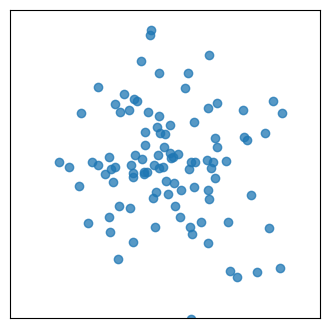

In [9]:
# Just noise
np.random.seed(43)
plt.figure(figsize = (4, 4))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x1, y1 = np.random.randn(2, 100)
plt.scatter(x1, y1, alpha = 0.75);
# plt.savefig('images/s1.png')
print(np.corrcoef(x1, y1))

[[1.         0.94882263]
 [0.94882263 1.        ]]


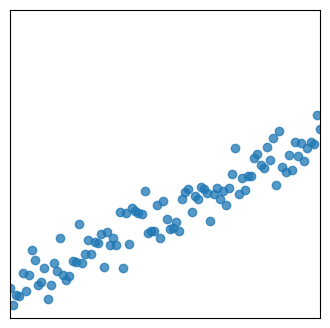

In [10]:
# Strong linear
np.random.seed(43)
plt.figure(figsize = (4, 4))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x2 = np.linspace(-3, 3, 100)
y2 = x2*0.5 - 1 + np.random.randn(100)*0.3
plt.scatter(x2, y2, alpha = 0.75);
# plt.savefig('images/s2.png')
print(np.corrcoef(x2, y2))

[[1.         0.05201679]
 [0.05201679 1.        ]]


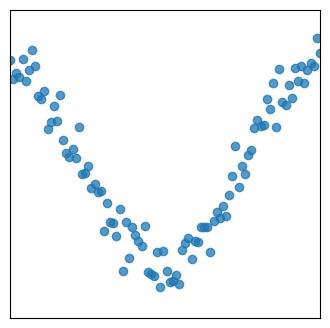

In [11]:
# Strong non-linear
np.random.seed(43)
plt.figure(figsize = (4, 4))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x3 = np.linspace(-3, 3, 100)
y3 = 2*np.sin(x3 - 1.5) + np.random.randn(100)*0.3
plt.scatter(x3, y3, alpha = 0.75);
# plt.savefig('images/s3.png')
print(np.corrcoef(x3, y3))

[[1.         0.70406276]
 [0.70406276 1.        ]]


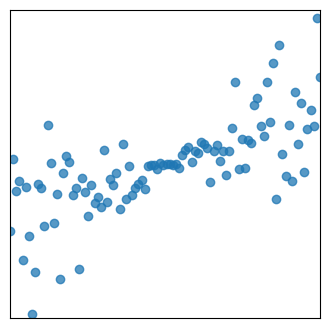

In [12]:
# Unequal spread
np.random.seed(43)
plt.figure(figsize = (4, 4))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x4 = np.linspace(-3, 3, 100)
y4 = x4/3 + np.random.randn(100)*(x4)/2.5
plt.scatter(x4, y4, alpha = 0.75);
# plt.savefig('images/s4.png')
print(np.corrcoef(x4, y4))

## Simple Linear Regression

First, let's implement the tools we'll need for regression.

In [13]:

def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

# correlation coefficient (r)
def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

Let's read in our data.

In [14]:
df = pd.read_csv('galton.csv').iloc[:, 1:]
# data btw parent height and child's height in inches
# https://ytliu0.github.io/Stat390EF-R-Independent-Study-archive/RMarkdownExercises/Galton_solution.html

In [15]:
df

,parent,child
0,70.5,61.7
1,68.5,61.7
2,65.5,61.7
3,64.5,61.7
4,64.0,61.7
...,...,...
923,69.5,73.7
924,69.5,73.7
925,69.5,73.7
926,69.5,73.7


In [16]:
max(df['parent'])

73.0

In [17]:
min(df['parent'])

64.0

In [18]:
max(df['child'])

73.7

In [19]:
#fig = px.scatter(df, x= 'parent', y = 'child')
#fig.show()

An interesting issue is that both our `parent` and `child` columns occur at fixed positions. We need to add some random noise, otherwise we'll suffer from gross overplotting.

In [20]:
df['parent'] = df['parent'] + np.random.randn(len(df))/2
df['child'] = df['child'] + np.random.randn(len(df))/2

In [21]:
fig = px.scatter(df, x= 'parent', y = 'child')
fig.show()

Using our `correlation` function:

In [22]:
correlation(df['parent'], df['child'])

0.4404222609861382

Using an in-built `correlation` function:

In [23]:
# using numpy version of correlation
np.corrcoef(df['parent'], df['child'])

array([[1.        , 0.44042226],
       [0.44042226, 1.        ]])

In [24]:
# using the dataframe correlation function
df.corr()

,parent,child
parent,1.000000,0.440422
child,0.440422,1.000000


All the same result.

What we now want to do is compute the **average $y$ for a given $x$**. A practical way to do this is to "bin" our x axis into 1-unit wide buckets, and then compute the average $y$ value for everything in that bucket. (We could choose bins of any width, though.)

In [25]:
def predict_mean_y(x):
    return df.loc[np.abs(df['parent'] - x) <= 0.5, 'child'].mean()

In [26]:
# to better understand what is going on above, we look at the values before running "mean"
def predict_y_exp(x):
    return df.loc[np.abs(df['parent'] - x) <= 0.5, 'child']

In [27]:
df_exp= df['parent'].apply(predict_y_exp)

In [28]:
df_exp[0:1]

,0,12,44,50,53,56,103,104,151,154,...,858,406,914,916,527,862,863,897,899,900
0,62.343309,63.259953,64.072309,64.22947,64.610474,63.725401,65.795242,65.348472,65.293516,65.443402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
np.nanmean(df_exp[0:1].to_numpy())
# this is the same value below as the first child_predicted value of row 0

69.33943375224987

In [30]:
df['child_predicted'] = df['parent'].apply(predict_mean_y)

In [31]:
df

,parent,child,child_predicted
0,70.601838,62.343309,69.339434
1,67.571740,61.812151,67.587075
2,65.689095,62.086377,66.389338
3,65.118070,61.840201,66.237821
4,63.655014,62.419532,65.466284
...,...,...,...
923,69.124362,73.727613,68.379916
924,70.235307,73.875448,69.106005
925,69.361830,73.548774,68.559465
926,69.673734,73.816772,68.751565


Now, let's look at our predictions:

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['parent'], y = df['child'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = df['parent'], y = df['child_predicted'], mode = 'markers', name = 'predicted means', line=dict(color='gold')))
fig.update_layout(xaxis_title = 'MidParent Height', yaxis_title = 'Child Height')

Save for the tails where there are fewer values to draw from, it seems like our red predictions roughly follow a straight line piercing through the "middle" of our point cloud. That's our motivation for using a line to model this bivariate (two variables) data.

Note: The cool thing about plotly is that you can hover over the points and it will tell you whether it is a prediction or actual value.

Now, it's time to implement the optimal coefficients.

In [33]:
# this is using the standard unit approach
def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def slope2(x, y):
    xarr = x.to_numpy()
    yarr = y.to_numpy()
    x_mean = xarr.mean()
    y_mean = yarr.mean()
    xy_arr = xarr * yarr
    xy_arr_mean = xy_arr.mean()
    xsquare = xarr **2
    xsquare_mean = xsquare.mean()
    return ((x_mean*y_mean) - xy_arr_mean)/((x_mean)**2 - xsquare_mean )



def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

def intercept2(x,y):
    xarr = x.to_numpy()
    yarr = y.to_numpy()    
    y_mean = yarr.mean()
    x_mean = xarr.mean()
    return y_mean - (slope2(x, y) * x_mean)

In [34]:
ahat = intercept(df['parent'], df['child'])
bhat = slope(df['parent'], df['child'])

m = slope2(df['parent'], df['child'])
b = intercept2(df['parent'], df['child'])


print("Derivatives Approach: predicted y = {} + {} * average parent's height".format(np.round(ahat, 2), np.round(bhat, 2)))

print("Algebra Approach:  m = {} b= {} ".format(np.round(m, 2), np.round(b, 2)))

Derivatives Approach: predicted y = 26.51 + 0.61 * average parent's height
Algebra Approach:  m = 0.61 b= 26.51 


Let's see what our linear model looks like.

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['parent'], y = df['child'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = df['parent'], y = df['child_predicted'], mode = 'markers', name = 'predicted means', line=dict(color='gold')))
fig.add_trace(go.Scatter(x = df['parent'], y = ahat + bhat*df['parent'], name = 'linear model', line=dict(color='red')))


fig.update_layout(xaxis_title = 'MidParent Height', yaxis_title = 'Child Height')

## Multiple Linear Regression

Let's load in a new dataset. This is aggregate per-player data from the 2018-19 NBA season.

In [36]:
nba = pd.read_csv('nba18-19.csv')

In [37]:
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,528,Tyler Zeller\zellety01,C,29,MEM,4,1,20.5,4.0,7.0,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,529,Ante Žižić\zizican01,C,22,CLE,59,25,18.3,3.1,5.6,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,530,Ivica Zubac\zubaciv01,C,21,TOT,59,37,17.6,3.6,6.4,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,530,Ivica Zubac\zubaciv01,C,21,LAL,33,12,15.6,3.4,5.8,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


Let's suppose our goal is to predict the number of points someone averaged (`PTS`; this is our dependent variable). The independent variables we'll use are
- `AST`, the average number of assists per game, and
- `3PA`, the number of 3 point field goals attempted per game

In [38]:
nba[['AST', '3PA', 'PTS']]

,AST,3PA,PTS
0,0.6,4.1,5.3
1,0.8,1.5,1.7
2,1.9,2.2,3.2
3,1.6,0.0,13.9
4,2.2,0.2,8.9
...,...,...,...
703,0.8,0.0,11.5
704,0.9,0.0,7.8
705,1.1,0.0,8.9
706,0.8,0.0,8.5


First, let's explore and fit a model using just `AST`.

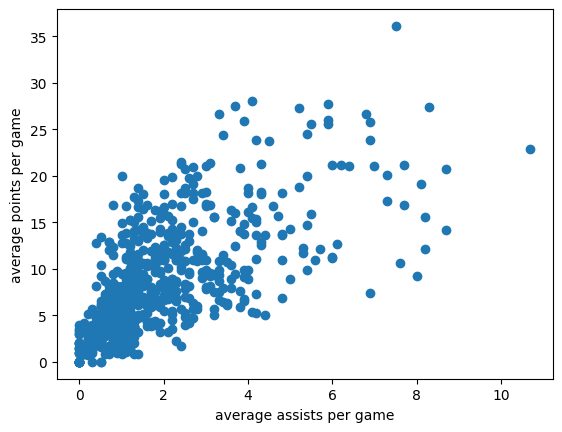

In [39]:
plt.scatter(nba['AST'], nba['PTS'])
plt.xlabel('average assists per game')
plt.ylabel('average points per game');

In [40]:
r_nba = correlation(nba['AST'], nba['PTS'])
r_nba

0.6760218567449273

The correlation between `AST` and `PTS` is relativelty strong. However, the scatter plot above tells us this isn't exactly the optimal setting in which to perform linear regression. For the purposes of illustration, we'll continue with it anyways.

In [41]:
ahat_nba = intercept(nba['AST'], nba['PTS'])
bhat_nba = slope(nba['AST'], nba['PTS'])

print("predicted PTS = {} + {} * AST".format(np.round(ahat_nba, 2), np.round(bhat_nba, 2)))

m_nba = slope2(nba['AST'], nba['PTS'])
b_nba = intercept2(nba['AST'], nba['PTS'])


print("Algebra Approach:  m = {} b= {} ".format(np.round(m_nba, 2), np.round(b_nba, 2)))

predicted PTS = 3.98 + 2.4 * AST
Algebra Approach:  m = 2.4 b= 3.98 


Let's take a look at our prediction:

In [42]:
pred_ast_only = ahat_nba + bhat_nba*nba['AST']

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = nba['AST'], y = nba['PTS'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = nba['AST'], y = pred_ast_only, name = 'predictions', line=dict(color='red')))


fig.update_layout(xaxis_title = 'AST', yaxis_title = 'PTS')

Our model does _okay_. Let's compute the RMSE (that is, the square root of the mean squared error; we take the square root so that the RMSE is in the same units as our $y$ values). We will use this as a baseline for when we add more indepedent variables.

In [44]:
def mse(y, yhat):
    return np.mean((y - yhat)**2)

In [45]:
def rmse(y, yhat):
    return mse(y, yhat)**0.5

In [46]:
rmse_ast_only = rmse(nba['PTS'], pred_ast_only)

In [47]:
rmse_ast_only

4.291659114148544

There's still a ton of variation in our model. Let's see if we can do better, by incorporating `3PA` as well (that is, the average number of 3 point shot attempts they made per game).

Specifically, we're looking to create the model

$$\text{predicted PTS} = \theta_0 + \theta_1 \cdot \text{AST} + \theta_2 \cdot \text{3PA}$$

In orrder to do this, we're going to import a new library, called `sklearn`. Don't worry too much about what it's doing for now – we will dedicate an entire section of lecture to it in 2 lectures from now.  "sklearn is pronounced by data scientist as Sy-Kit-Learn"

In [48]:
import sklearn.linear_model as lm

In [49]:
model = lm.LinearRegression(fit_intercept = True)

model.fit(nba[['AST', '3PA']], nba['PTS']);

In [50]:
model.coef_

array([1.64065507, 1.25758096])

In [51]:
model.intercept_

2.1563470475148323

2.1563The above outputs tell us that the parameters that minimize MSE for this model are
- $\theta_0 = 2.1563$
- $\theta_1 = 1.6407$
- $\theta_2 = 1.2576$

Meaning our predictions should be of the form

$$\text{predicted PTS} = 2.1563 + 1.6407 \cdot \text{AST} + 1.2576 \cdot \text{3PA}$$

Let's visualize what our model and predictions look like.

In [52]:
# let's try steph curry's statistics
# https://www.google.com/search?q=step+curry+statistics&oq=step+curry+statistics&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIJCAEQABgNGIAEMggIAhAAGA0YHjIKCAMQABgKGBYYHjIKCAQQABgKGBYYHjIICAUQABgWGB4yCAgGEAAYFhgeMggIBxAAGBYYHjIKCAgQABgKGBYYHjIICAkQABgWGB7SAQg2OTc2ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8
# mar 1st with Raptors
my_ast = 6
my_3pa = 15
my_pred = 2.1563 + 1.6407 * my_ast + 1.2576* my_3pa
my_pred

30.8645

In [53]:
pred_ast_3pa = model.predict(nba[['AST', '3PA']])

In [54]:
fig = go.Figure()

nba_data_raw = go.Scatter3d(x = nba['AST'], y = nba['3PA'], z = nba['PTS'],
            mode = 'markers', marker=dict(color='cornflowerblue', size = 5), name = 'actual')

num_points = 100
xvalues = np.linspace(0, 11, num_points)
yvalues = np.linspace(0, 10, num_points)
(u,v) = np.meshgrid(xvalues, yvalues)
ast3pa = np.vstack((u.flatten(),v.flatten()))

pred_pts = np.array([model.predict(coord.reshape(1, -1)) for coord in ast3pa.T])

loss_surface = go.Surface(x=u, y=v, z=np.reshape(pred_pts, u.shape), name = 'predicted')

# prediction_surface = go.Scatter3d(x = nba['AST'], y = nba['3PA'], z = pred_ast_3pa, line = dict(color='gold'),
#                                  mode = 'markers')

fig.add_trace(loss_surface)
fig.add_trace(nba_data_raw)

fig.update_layout(scene = dict(
    xaxis_title = "AST",
    yaxis_title = "3PA",
    zaxis_title = "PTS"))

fig.show()

/Users/seankang/anaconda3/envs/Assignment3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/Users/seankang/anaconda3/envs/Assignment3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/Users/seankang/anaconda3/envs/Assignment3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/Users/seankang/anaconda3/envs/Assignment3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/Users/seankang/anaconda3/envs/Assignment3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/Users/seankang/anac

Instead of our model being a line, it is now a plane in 3D (the colorful surface above). The blue points above are the true `PTS` values.

It's sometimes hard to interpret things in 3D; we can also visualize in 2D.

In [55]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = nba['AST'], y = nba['PTS'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = nba['AST'], y = pred_ast_only, name = 'lm AST only', line=dict(color='red')))
fig.add_trace(go.Scatter(x = nba['AST'], y = pred_ast_3pa, mode = 'markers', name = 'lm AST 3PA', line=dict(color='gold')))


fig.update_layout(xaxis_title = 'average assists per game', yaxis_title = 'points per game')

The yellow dots are the result of our updated linear model. It doesn't look linear here, because it is not solely a function of assists per game. (It was linear in the 3D figure above.) The yellow points here all lie on the colorful plane above.

We can also scatter our predicted values vs. our actual values.

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = nba['PTS'], y = pred_ast_only, mode = 'markers', name = 'lm AST only', line=dict(color='red')))
fig.add_trace(go.Scatter(x = nba['PTS'], y = pred_ast_3pa, mode = 'markers', name = 'lm AST 3PA', line=dict(color='gold')))


fig.update_layout(xaxis_title = 'actual points per game', yaxis_title = 'predicted points per game')

Let's also look at our RMSE.

In [57]:
pred_ast_3pa = model.predict(nba[['AST', '3PA']])

rmse_ast_3pa = rmse(nba['PTS'], pred_ast_3pa)
rmse_ast_3pa

3.6427935954265123

It's noticably lower than before!

In [58]:
rmse_ast_only

4.291659114148544

##  $R^2$

In [59]:


def total_variance(y):
    y_mean = np.mean(y)
    return np.mean((y - y_mean)**2)

pts_total_variance =  total_variance(nba['PTS'])
pts_total_variance

33.919937817198125

In [60]:
def r_square(y, y_hat):
    return 1-(mse(y, y_hat)/total_variance(y))



In [61]:

r_square_ast_only = r_square(nba['PTS'], pred_ast_only)
r_square_ast_only
# according to our scoring sheet, this is very poor fit, or a very little relationship

0.45700555079685967

## Another way to solve $R^2$

In [62]:
r2_ast_only = np.var(pred_ast_only) / np.var(nba['PTS'])
r2_ast_3pa = np.var(pred_ast_3pa) / np.var(nba['PTS'])

In [63]:
r2_ast_only


0.45700555079685856

In [64]:
correlation(pred_ast_only, nba['PTS'])**2

0.4570055507968595

In [65]:
import numpy as np
from scipy.stats import pearsonr
correlation = np.corrcoef(nba['AST'], nba['PTS'])[0, 1]
correlation


0.6760218567449279

In [66]:
corr, p = pearsonr(nba['AST'], nba['PTS'])
print("Correlation coefficient:", corr)
print("P-value {:.7f}".format(p))

Correlation coefficient: 0.6760218567449279
P-value 0.0000000


In [67]:
corr, p = pearsonr(nba['3PA'], nba['PTS'])
print("Correlation coefficient:", corr)
print("P-value {:.7f}".format(p))

Correlation coefficient: 0.6666728790120896
P-value 0.0000000


In [68]:
corr, p = pearsonr(nba['3PA'], nba['AST'])
print("Correlation coefficient:", corr)
print("P-value {:.7f}".format(p))
# no collinearity

Correlation coefficient: 0.4808797081819846
P-value 0.0000000


In [69]:
r2_ast_3pa

0.6087862763665715

In [70]:
corr = correlation(pred_ast_3pa, nba['PTS'])
corr**2


TypeError: 'numpy.float64' object is not callable

In [ ]:
np.corrcoef(pred_ast_3pa, nba['PTS'])[0, 1]**2

0.6087862763665716

This means that our model that only uses `AST` can explain 45% of the variation of the true observations (`PTS` values), while our model that uses `AST` and `3PA` can explain 60% of the variation. 